In [96]:
#Import necessary  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

In [97]:
#Import data
data=pd.read_csv("C:/Users/hp/Downloads/winequality-red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [98]:
# Explore the first few rows of the dataset
print(data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [99]:
# Check for missing values
print(data.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [100]:
# Summarize the dataset
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [101]:
# Split the data into features and target variable
X = data.drop('quality', axis=1)
y = data['quality']
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [102]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

In [103]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [104]:
# Randomforest
classifier = RandomForestClassifier(random_state = 0, n_estimators = 100,criterion = 'entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [105]:
# Model Evaluation
y_pred = classifier.predict(X_test)
#Evaluating the Algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100))

Mean Absolute Error: 0.296875
Mean Squared Error: 0.359375
Root Mean Squared Error: 0.5994789404140899
Accuracy: 73.44


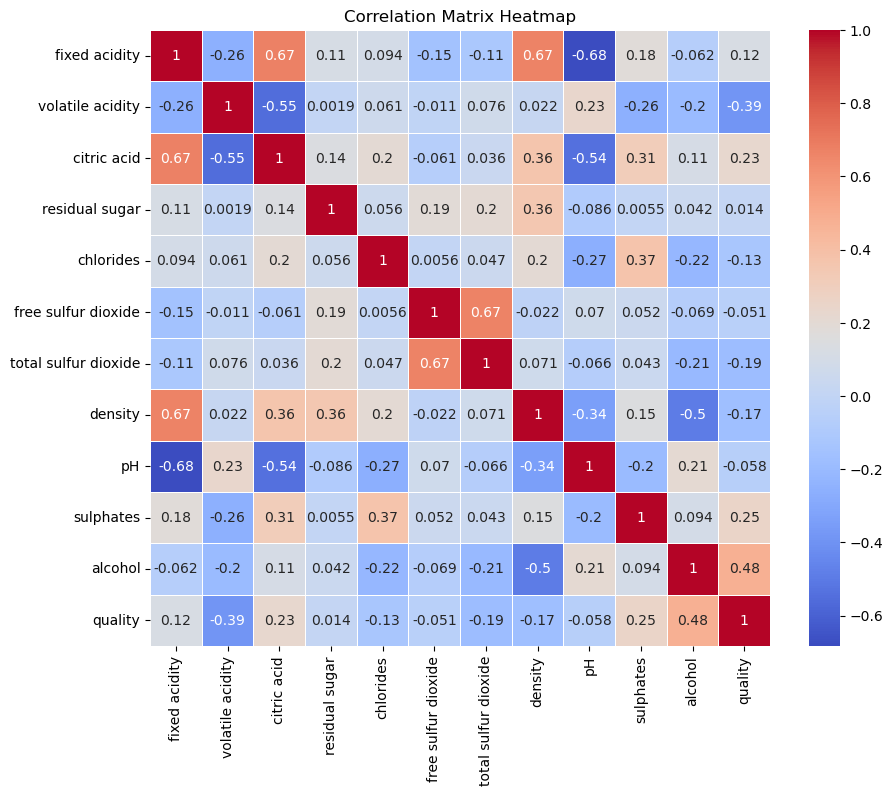

In [106]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

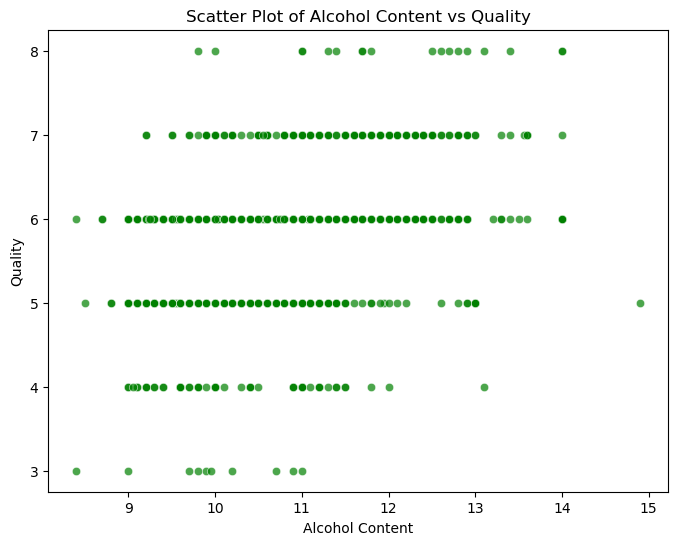

In [107]:
# Scatter plot of alcohol content vs quality
plt.figure(figsize=(8, 6))
sns.scatterplot(x='alcohol', y='quality', data=data, color='green', alpha=0.7)
plt.title('Scatter Plot of Alcohol Content vs Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Quality')
plt.show()

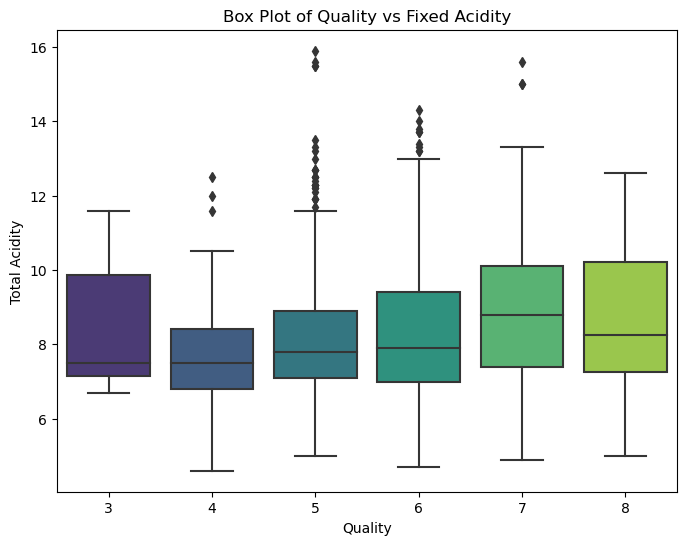

In [108]:
# Box plot of quality vs fixed acidity
plt.figure(figsize=(8, 6))
sns.boxplot(x='quality', y='fixed acidity', data=data, palette='viridis')
plt.title('Box Plot of Quality vs Fixed Acidity')
plt.xlabel('Quality')
plt.ylabel('Total Acidity')
plt.show()

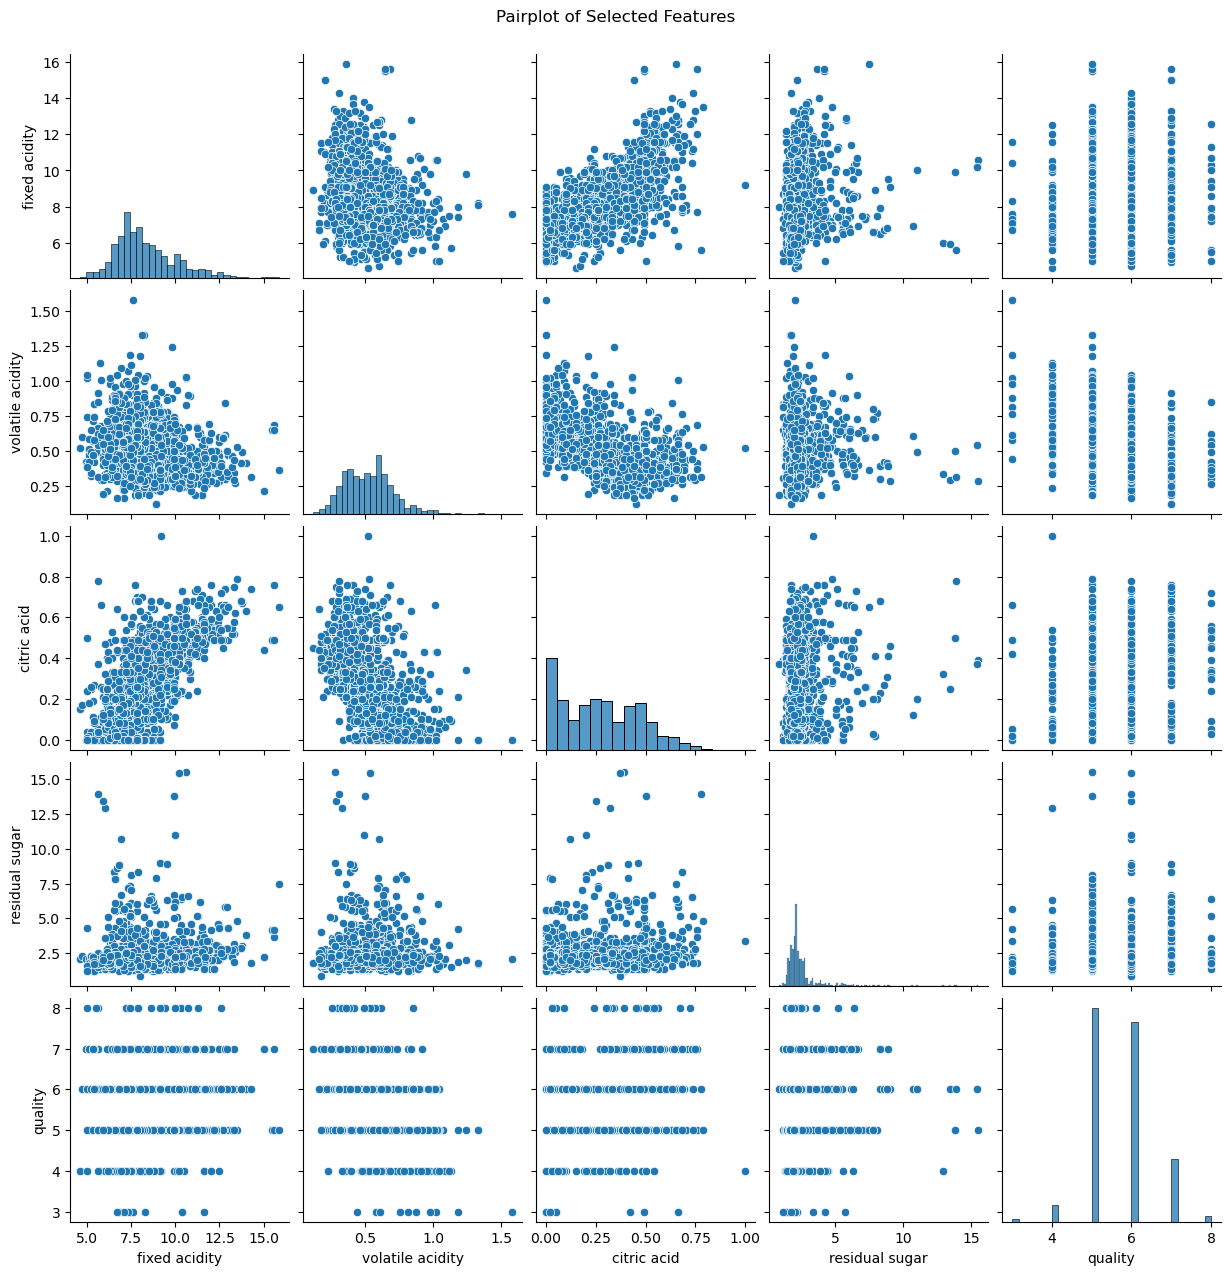

In [109]:
# Pairplot of selected features
selected_features = ['fixed acidity','volatile acidity', 'citric acid', 'residual sugar', 'quality']
sns.pairplot(data[selected_features])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

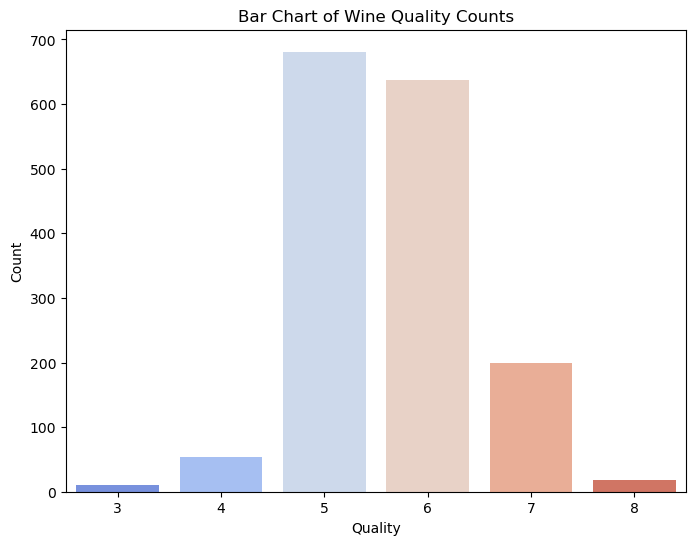

In [110]:
# Bar chart of wine quality counts
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=data, palette='coolwarm')
plt.title('Bar Chart of Wine Quality Counts')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

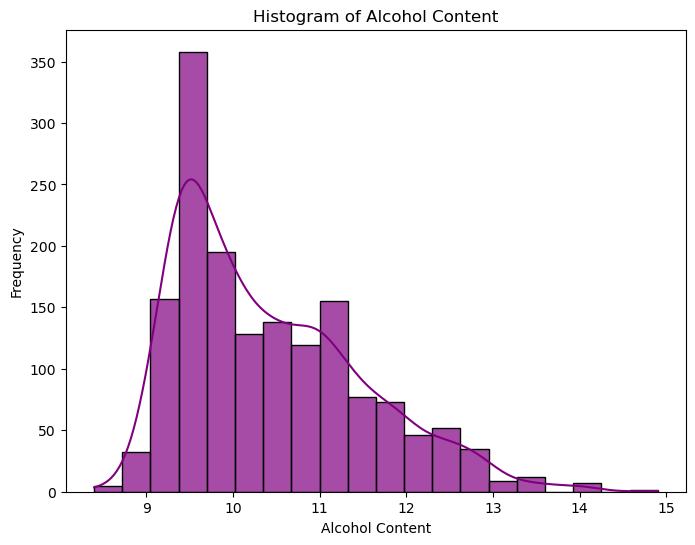

In [111]:
# Histogram of alcohol content
plt.figure(figsize=(8, 6))
sns.histplot(data['alcohol'], bins=20, kde=True, color='purple', alpha=0.7)
plt.title('Histogram of Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Frequency')
plt.show()

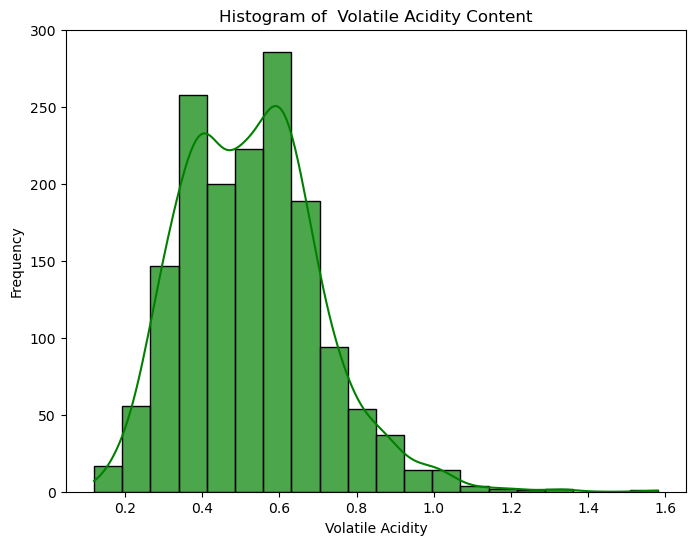

In [112]:
# Histogram of volatile acidity content
plt.figure(figsize=(8,6))
sns.histplot(data['volatile acidity'], bins=20, kde=True, color='green', alpha=0.7)
plt.title('Histogram of  Volatile Acidity Content')
plt.xlabel('Volatile Acidity')
plt.ylabel('Frequency')
plt.show()

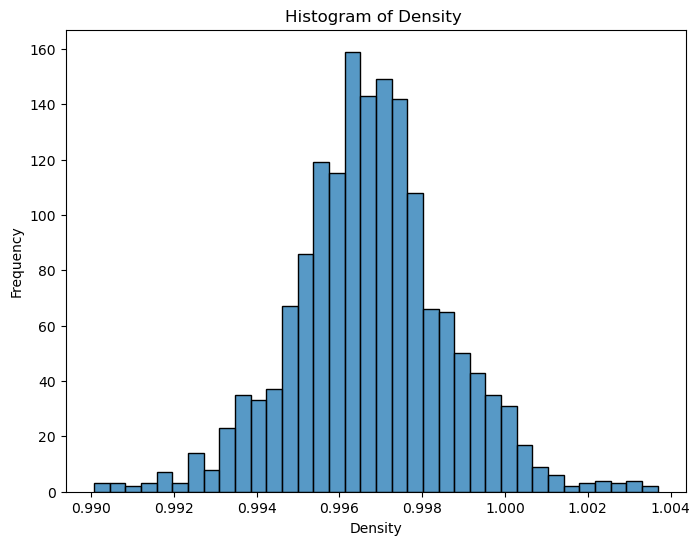

In [113]:
# Histogram of density content
plt.figure(figsize=(8,6))
sns.histplot(data['density'])
plt.title('Histogram of Density ')
plt.xlabel('Density')
plt.ylabel('Frequency')
plt.show()

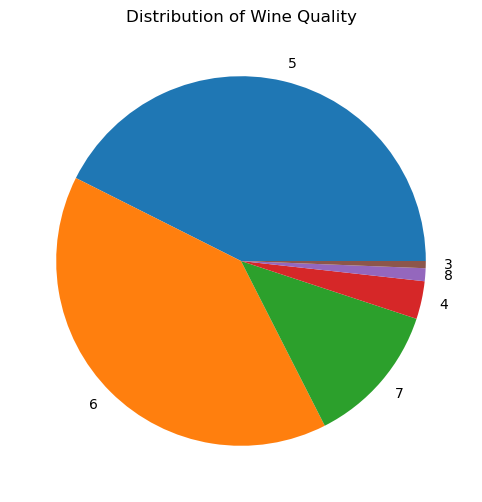

In [114]:
# Calculate value counts for quality
quality_counts = data['quality'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(quality_counts, labels=quality_counts.index)
plt.title('Distribution of Wine Quality')
plt.show()

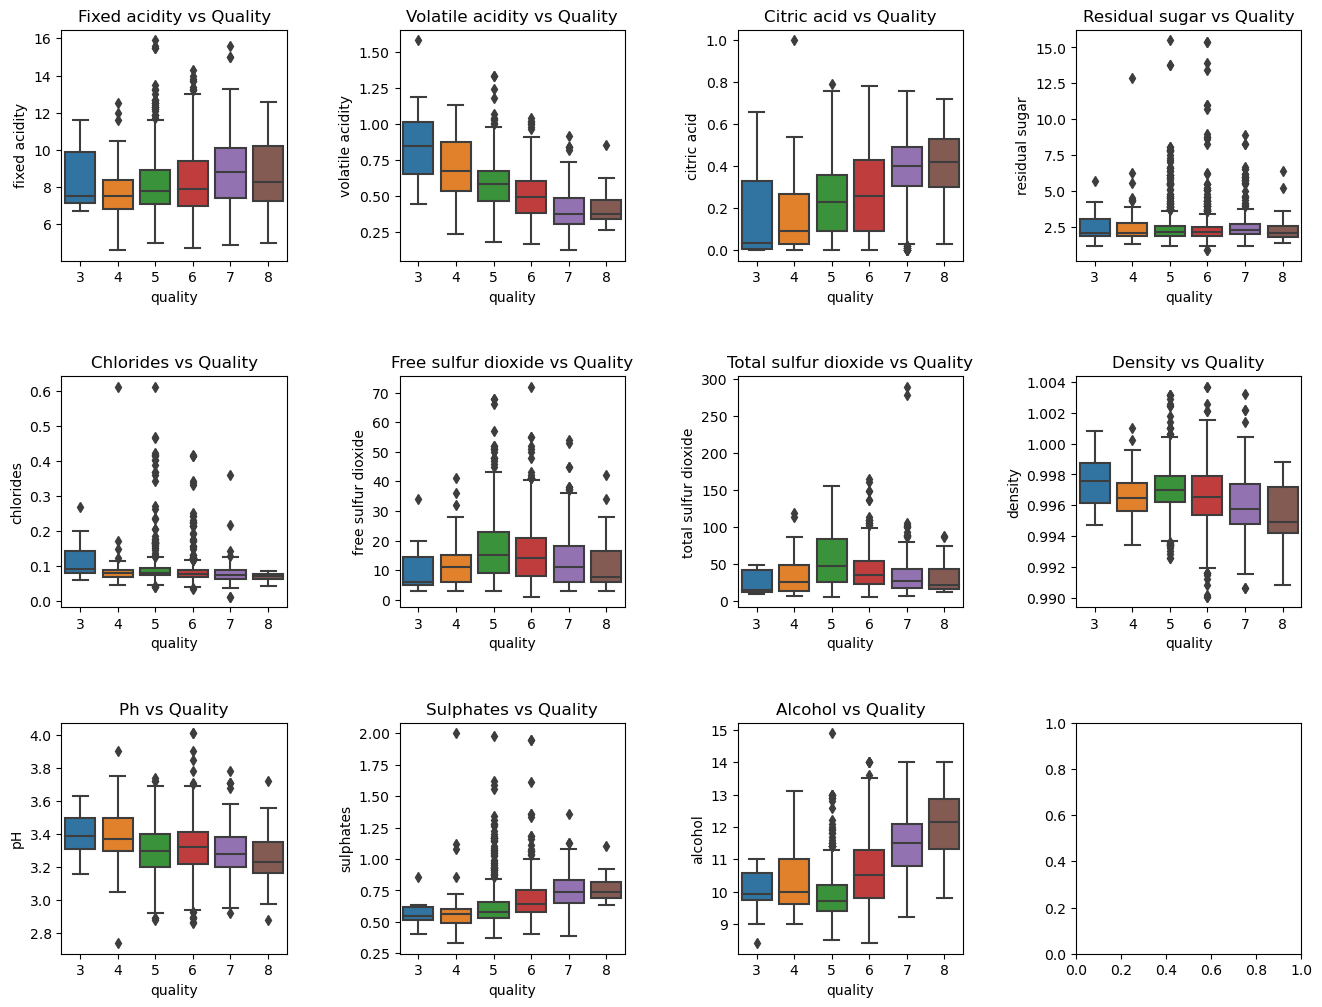

In [115]:
# Plotting
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i, column in enumerate(data.columns[:-1]):
    row = i // 4
    col = i % 4
    sns.boxplot(x='quality', y=column, data=data, ax=axes[row, col])
    axes[row, col].set_title(f'{column.capitalize()} vs Quality')

plt.show()

<Axes: title={'center': 'Correlation with quality'}>

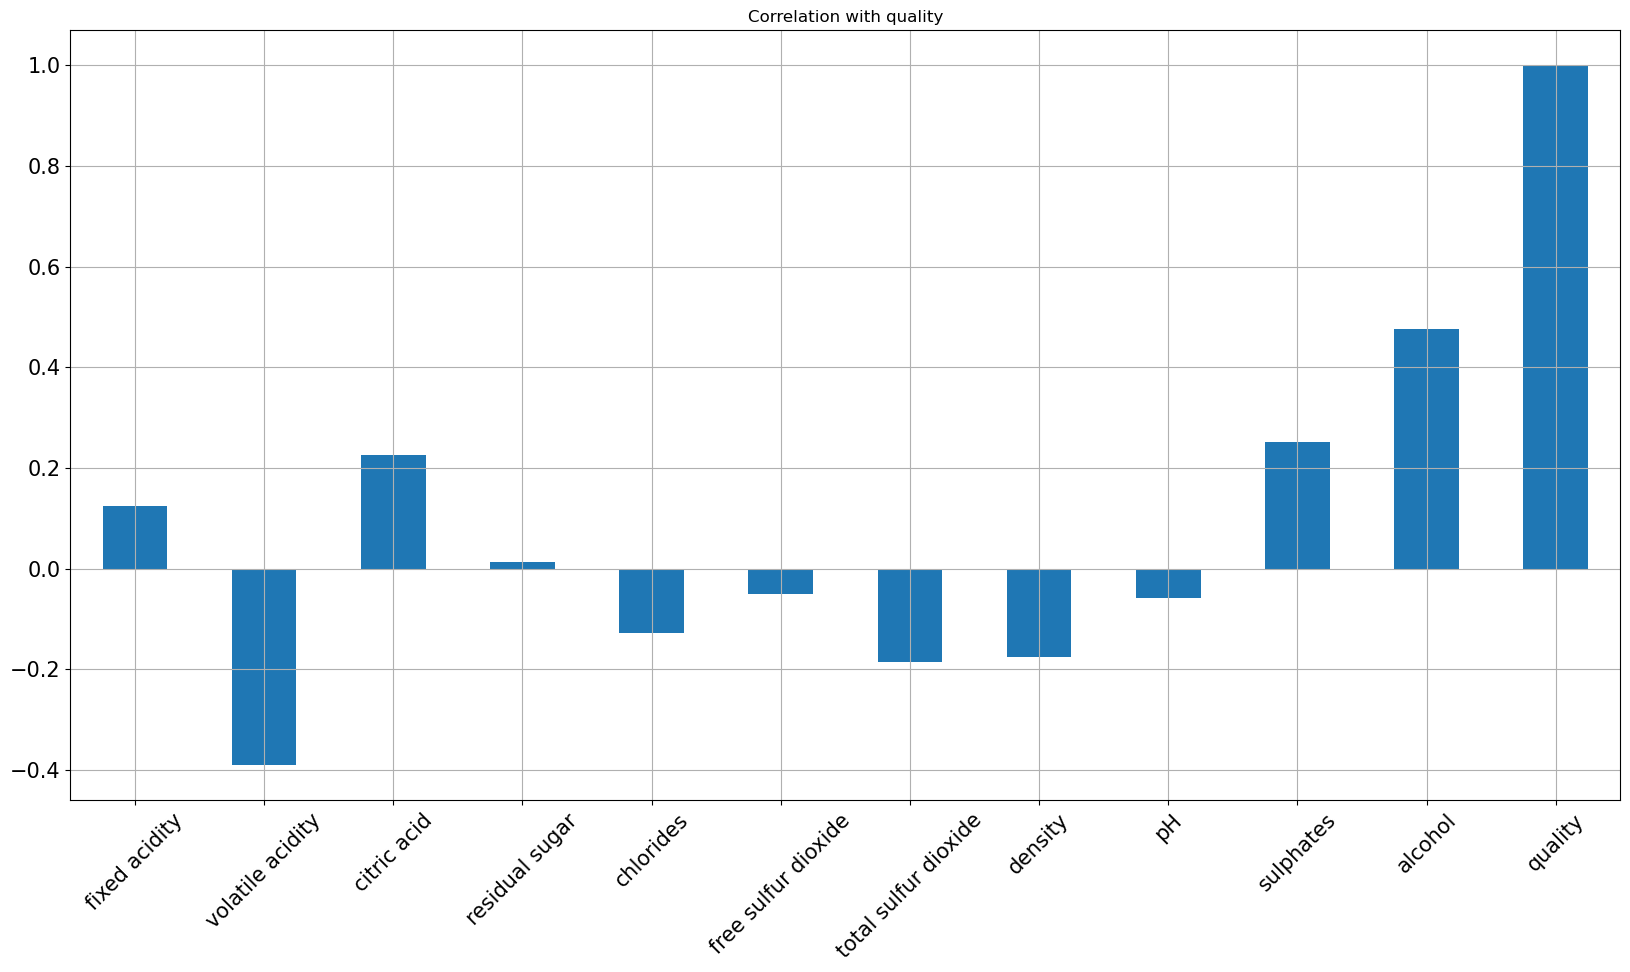

In [116]:
#Correlation with Quality with respect to attributes
data.corrwith(data.quality).plot.bar(
        figsize = (20, 10), title = "Correlation with quality", fontsize = 15,
        rot = 45, grid = True)